In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning
warnings.filterwarnings('ignore')

#PATH dove andare a leggere e a scrivere
PATH_TO_WRITE_ETL = "./dataset_modificato/"
PATH_FROM_READ_ETL = "./dataset_originale/"
PATH_FROM_READ_ANALYSIS = "./dataset_modificato/" 


df_team_stats = pd.read_csv("./ETL_Mat/stats_team.csv")

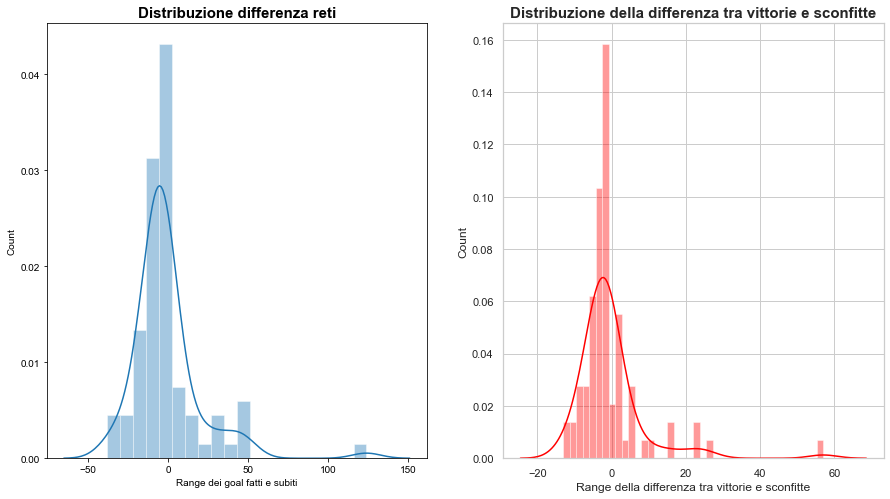

In [2]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df_team_stats['goal_differential'], kde=True, bins=20)
plt.title('Distribuzione differenza reti', fontweight='bold', fontsize=15)
plt.xlabel('Range dei goal fatti e subiti')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df_team_stats['win_lose_differential'], color = 'red',kde=True, bins=40)
plt.title('Distribuzione della differenza tra vittorie e sconfitte', fontweight='bold', fontsize=15)
plt.xlabel('Range della differenza tra vittorie e sconfitte')
plt.ylabel('Count')
plt.show()

In [3]:
df_team_stats['finals_win'].value_counts()


0    75
2     3
1     2
4     2
5     1
Name: finals_win, dtype: int64

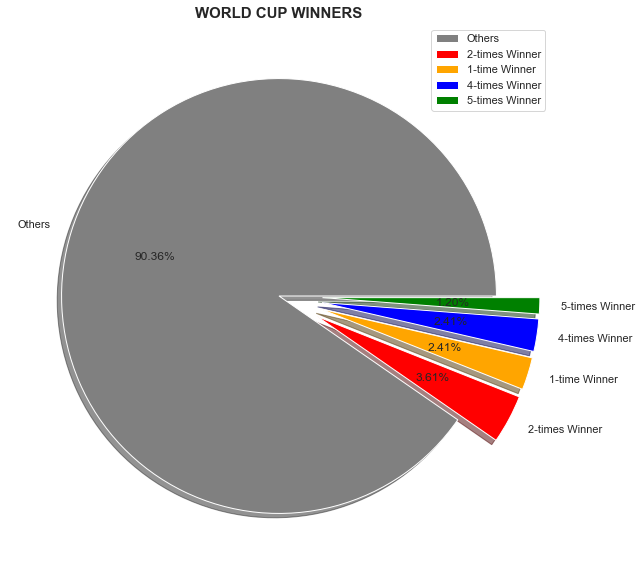

In [4]:
# GRAFICO A TORTA DEI VINCITORI DEI MONDIALI

labels = ['Others', '2-times Winner', '1-time Winner', '4-times Winner','5-times Winner']
size = df_team_stats['finals_win'].value_counts()
colors = ['grey','red','orange','blue','green']
explode = [0, 0.2, 0.2, 0.2, 0.2]

plt.figure(figsize=(10,10))
plt.pie(size, colors=colors, explode=explode,labels=labels, shadow=True, autopct= '%.2f%%')
plt.title('WORLD CUP WINNERS', fontweight='bold', fontsize=15)
plt.axis('off')
plt.legend()
plt.show()

[Text(0.5, 0, 'Titels'), Text(0, 0.5, 'Nations')]

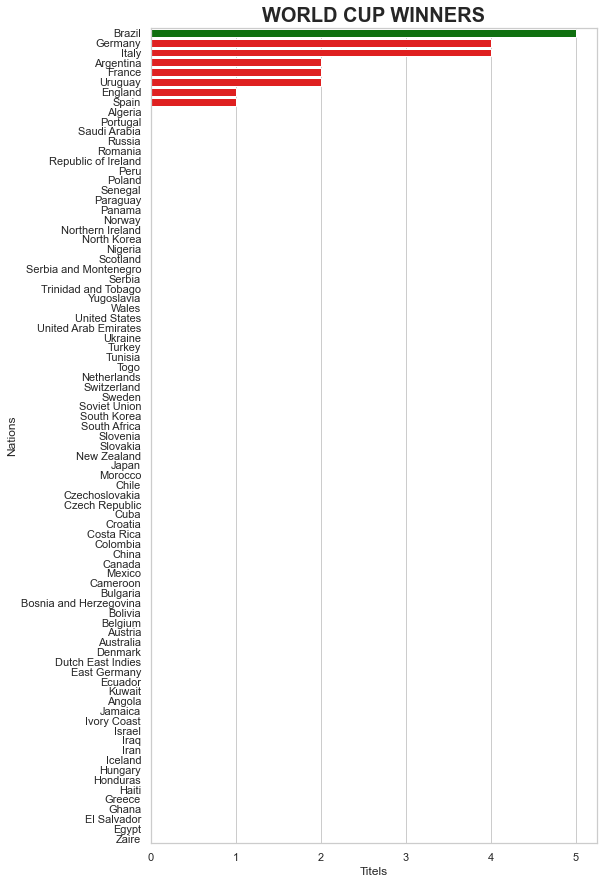

In [5]:
# DIAGRAMMA A BARRE DEI VINCITORI DEI MONDIALI

df_team_stats = df_team_stats.sort_values(by="finals_win",ascending=False)

fig, ax = plt.subplots(figsize=(8, 15))

for bars in ax.containers:
        ax.bar_label(bars, fmt='%.1f')
ax.set_title('WORLD CUP WINNERS', fontweight='bold', fontsize=20)

values = np.array(df_team_stats['finals_win']) 
clrs = ['red' if (x < max(values)) else 'green' for x in values ]
sns.barplot(data=df_team_stats, x="finals_win", y="team_name",palette=clrs)
ax.set(xlabel='Titels', ylabel='Nations')

[Text(0.5, 0, 'Goals'), Text(0, 0.5, 'Nations')]

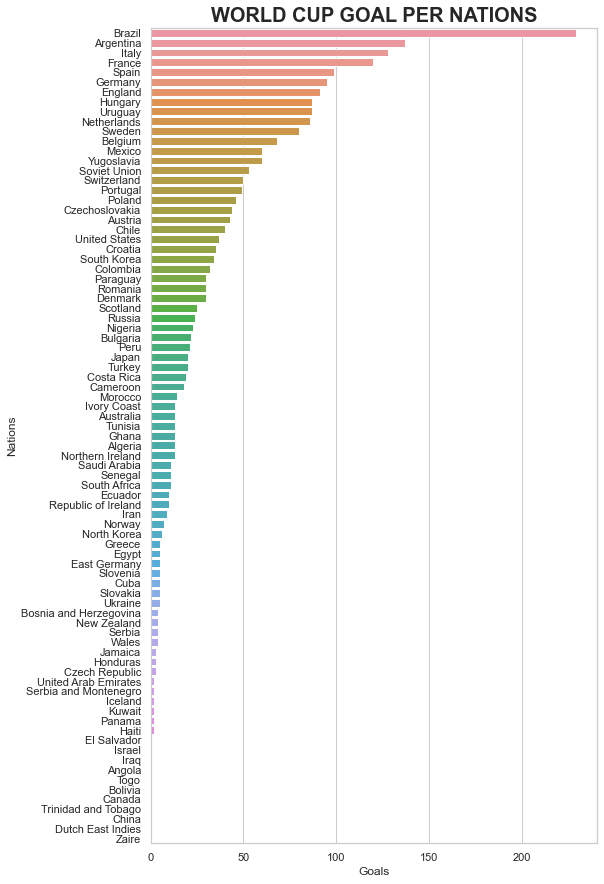

In [6]:
# DIAGRAMMA A BARRE DEI GOAL TOTALI PER OGNI NAZIONE

df_team_stats = df_team_stats.sort_values(by="goals_for",ascending=False)

fig, ax = plt.subplots(figsize=(8, 15))

ax.set_title('WORLD CUP GOAL PER NATIONS', fontweight='bold', fontsize=20)

sns.barplot(data=df_team_stats, x="goals_for", y="team_name")
ax.set(xlabel='Goals', ylabel='Nations')

[Text(0.5, 0, 'Players'), Text(0, 0.5, 'Nations')]

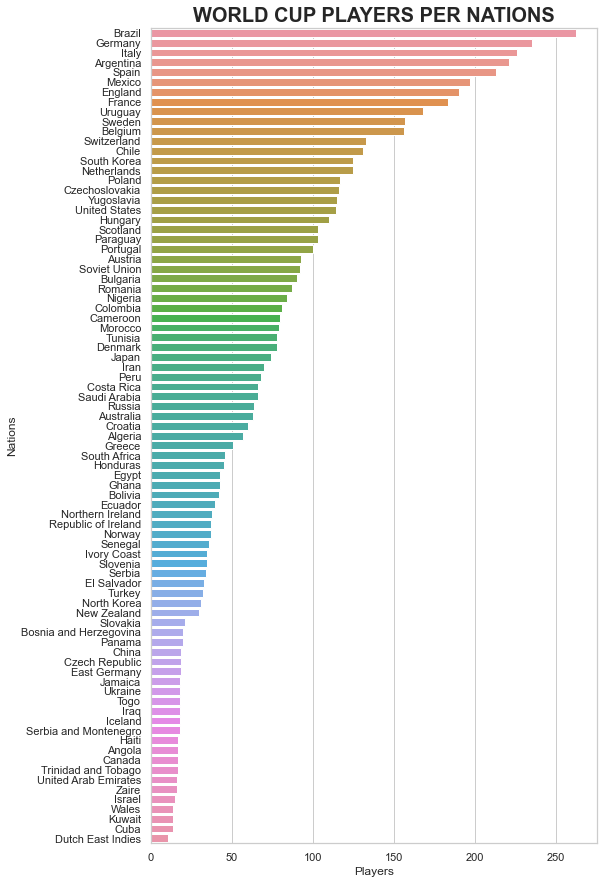

In [7]:
# DAIGRAMMA A BARRE DEI GIOCATORI TOTALI PER OGNI NAZIONE NEGLI ANNI

df_team_stats = df_team_stats.sort_values(by="player_per_teams",ascending=False)

fig, ax = plt.subplots(figsize=(8, 15))
ax.set_title('WORLD CUP PLAYERS PER NATIONS', fontweight='bold', fontsize=20)

sns.barplot(data=df_team_stats, x="player_per_teams", y="team_name")
ax.set(xlabel='Players', ylabel='Nations')

[Text(0.5, 0, 'Yellow Card'), Text(0, 0.5, 'Nations')]

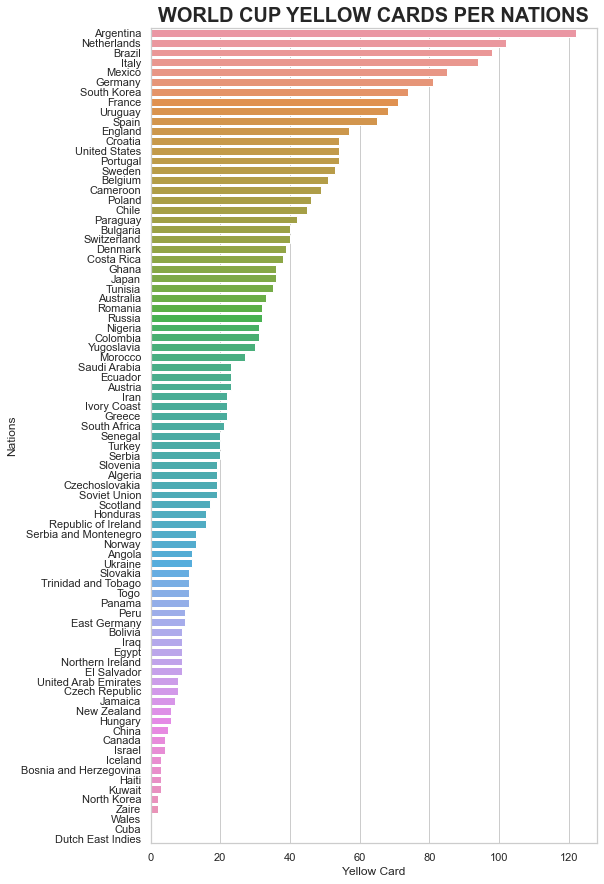

In [8]:
# DIAGRAMMA A BARRE DEI CARTELLI GIALLI TOTALI PER OGNI NAZIONE

df_team_stats = df_team_stats.sort_values(by="yellow_card",ascending=False)

fig, ax = plt.subplots(figsize=(8, 15))
ax.set_title('WORLD CUP YELLOW CARDS PER NATIONS', fontweight='bold', fontsize=20)

sns.barplot(data=df_team_stats, x="yellow_card", y="team_name")
ax.set(xlabel='Yellow Card', ylabel='Nations')

[Text(0.5, 0, 'Red Card'), Text(0, 0.5, 'Nations')]

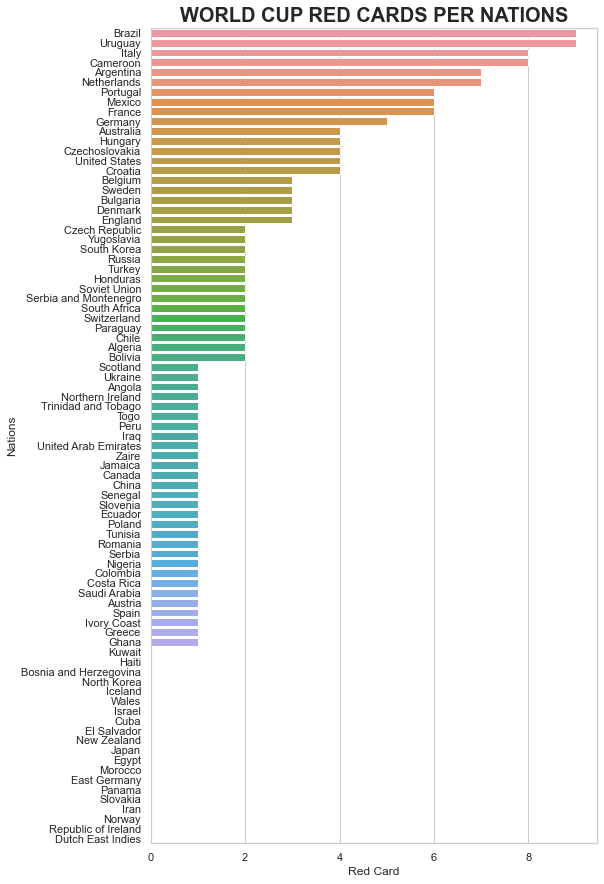

In [9]:
# DIGRAMMA A BARRE DEI CARTELLINI ROSSI TOTALI PER OGNI NAZIONE

df_team_stats = df_team_stats.sort_values(by="red_card",ascending=False)

fig, ax = plt.subplots(figsize=(8, 15))
ax.set_title('WORLD CUP RED CARDS PER NATIONS', fontweight='bold', fontsize=20)

sns.barplot(data=df_team_stats, x="red_card", y="team_name")
ax.set(xlabel='Red Card', ylabel='Nations')

In [10]:
df_team_per_year_stats = pd.read_csv("./ETL_Mat/stats_team_per_year.csv")

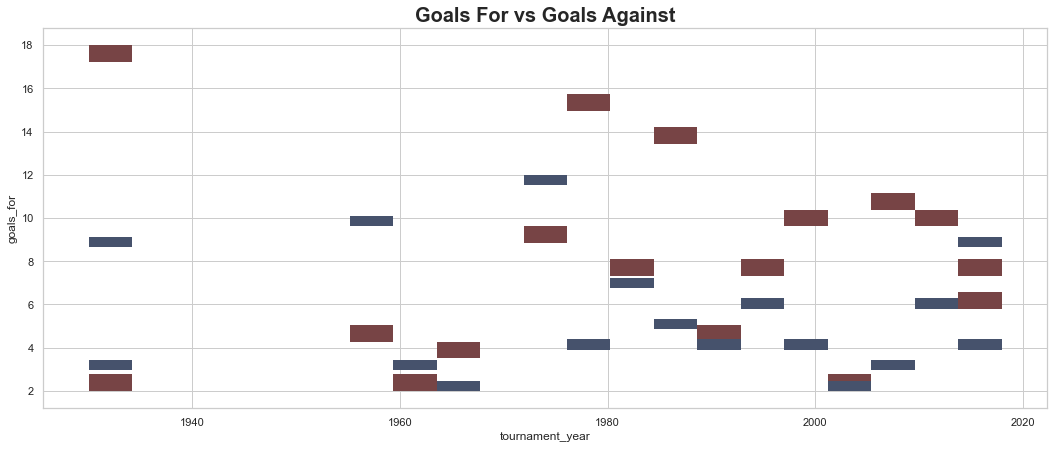

In [11]:
#  Goals For vs Goals Against
plt.figure(figsize=(18,7))
sns.histplot(x=df_team_per_year_stats['tournament_year'],y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Argentina"]['goals_for'], kde=False, bins=21,color='r')
#plt.show()
sns.histplot(x=df_team_per_year_stats['tournament_year'],y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Argentina"]['goals_against'], kde=False, bins=21,color='b')
plt.title('Goals For vs Goals Against', fontweight='bold', fontsize=20)
plt.show()



[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Goals for - Goals against')]

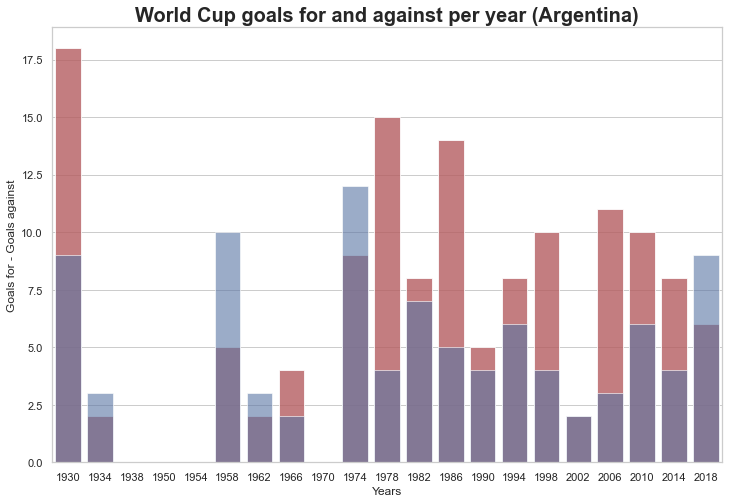

In [12]:
# DIFFERENZA RETI GOAL FATTI VS GOAL SUBITI CON BAR PLOT

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('World Cup goals for and against per year (Argentina)', fontweight='bold', fontsize=20)

ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Argentina"]['goals_for'], color='r', alpha=0.8)
ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Argentina"]['goals_against'], color='b', alpha=0.6)

ax.set(xlabel='Years', ylabel='Goals for - Goals against')

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Win - Lose')]

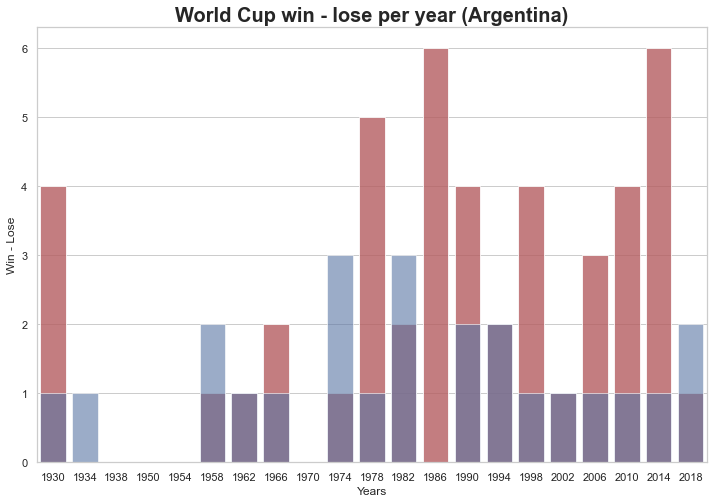

In [13]:
# DIFFERENZA VITTORIE VS SCONFITTE CON BAR PLOT

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('World Cup win - lose per year (Argentina)', fontweight='bold', fontsize=20)

ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Argentina"]['win'], color='r', alpha=0.8)
ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Argentina"]['lose'], color='b', alpha=0.6)

ax.set(xlabel='Years', ylabel='Win - Lose')

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Goals for - Goals against')]

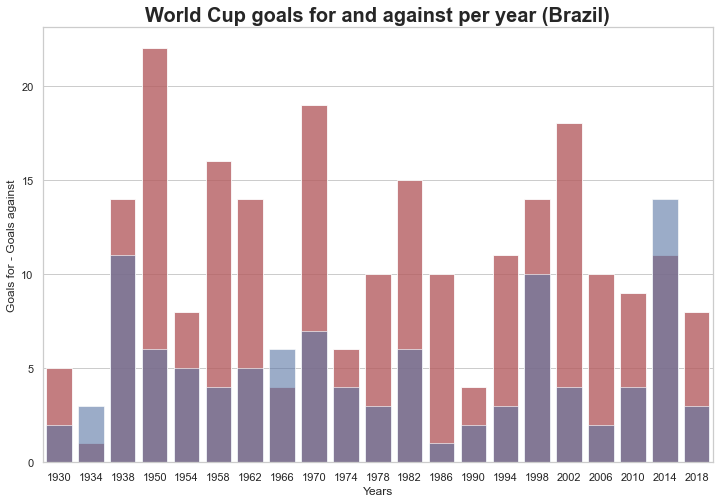

In [14]:
# DIFFERENZA RETI GOAL FATTI VS GOAL SUBITI CON BAR PLOT

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('World Cup goals for and against per year (Brazil)', fontweight='bold', fontsize=20)

ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Brazil"]['goals_for'], color='r', alpha=0.8)
ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Brazil"]['goals_against'], color='b', alpha=0.6)

ax.set(xlabel='Years', ylabel='Goals for - Goals against')

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Win - Lose')]

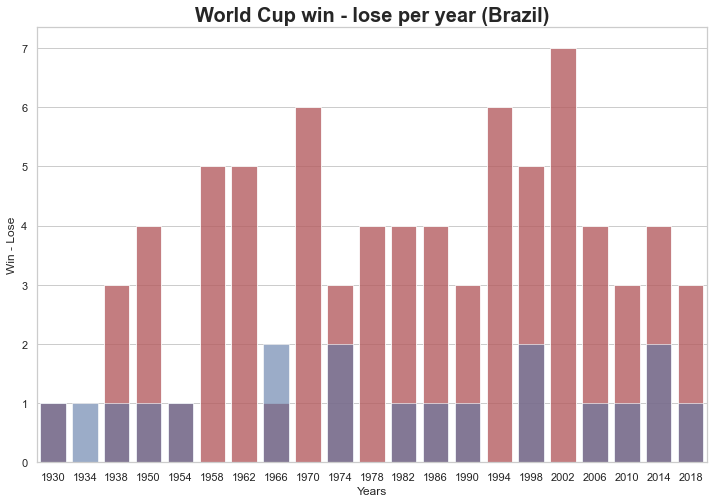

In [15]:
# DIFFERENZA VITTORIE VS SCONFITTE CON BAR PLOT

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('World Cup win - lose per year (Brazil)', fontweight='bold', fontsize=20)

ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Brazil"]['win'], color='r', alpha=0.8)
ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "Brazil"]['lose'], color='b', alpha=0.6)

ax.set(xlabel='Years', ylabel='Win - Lose')

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Goals for - Goals against')]

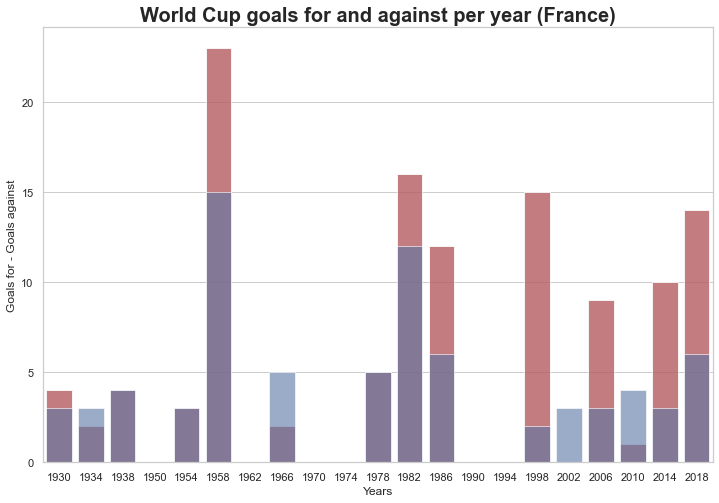

In [16]:
# DIFFERENZA RETI GOAL FATTI VS GOAL SUBITI CON BAR PLOT

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('World Cup goals for and against per year (France)', fontweight='bold', fontsize=20)

ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "France"]['goals_for'], color='r', alpha=0.8)
ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "France"]['goals_against'], color='b', alpha=0.6)

ax.set(xlabel='Years', ylabel='Goals for - Goals against')

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Win - Lose')]

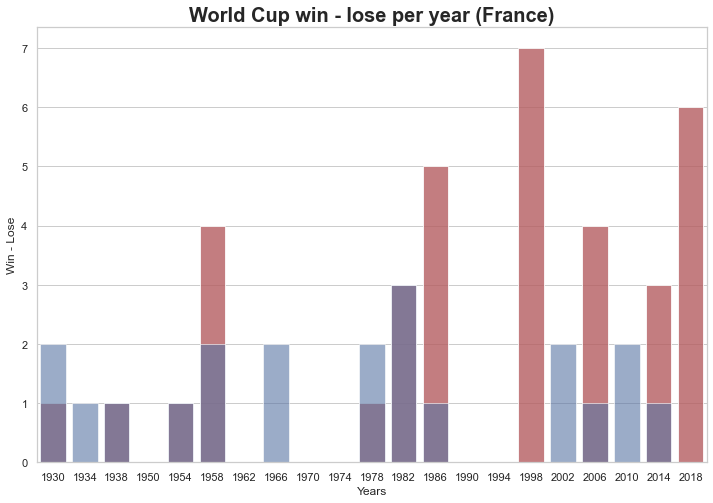

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('World Cup win - lose per year (France)', fontweight='bold', fontsize=20)

ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "France"]['win'], color='r', alpha=0.8)
ax=sns.barplot(data=df_team_per_year_stats, x="tournament_year", y=df_team_per_year_stats.loc[df_team_per_year_stats["team_name"] == "France"]['lose'], color='b', alpha=0.6)

ax.set(xlabel='Years', ylabel='Win - Lose')

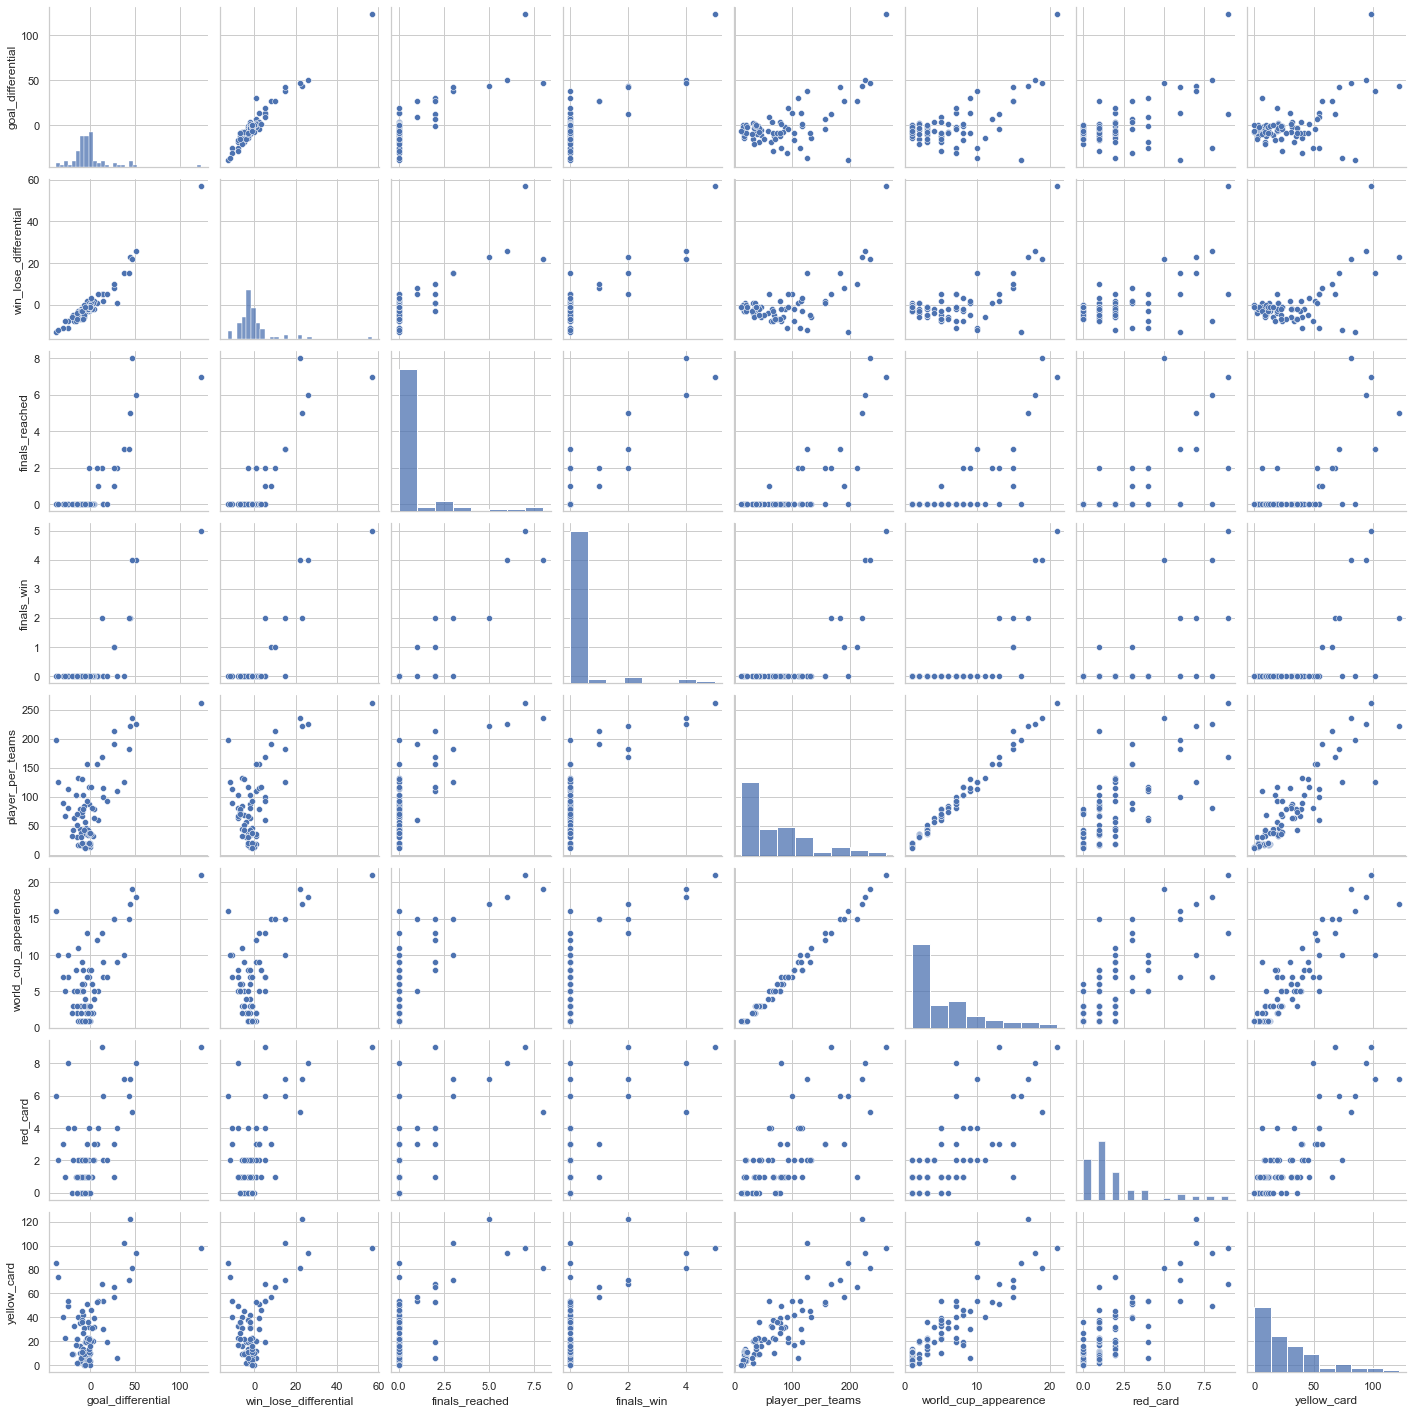

In [18]:
# GRAFICO CHE PUO' DARCI UN'IDEA DI QUALI DATI POTREBBERO ESSERE CORRELATI E SU CUI POTREBBE ESSERE UTILE FARE UN CLUSTERING

df_team_stats = df_team_stats[['team_id','goal_differential','win_lose_differential','finals_reached','finals_win','player_per_teams','world_cup_appearence','red_card','yellow_card']]
sns.pairplot(df_team_stats.drop(["team_id"], axis=1))

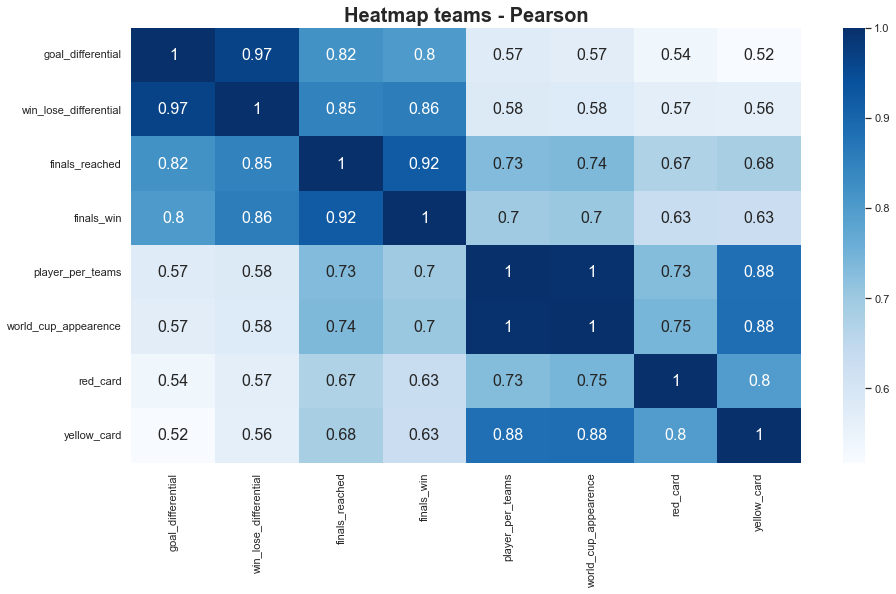

In [19]:
# HEATMAP CON CORRELAZIONE DI PEARSON

plt.figure(figsize=(15,8))
sns.heatmap(df_team_stats.drop(["team_id"], axis=1).corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap teams - Pearson', fontweight='bold', fontsize=20)
plt.show()

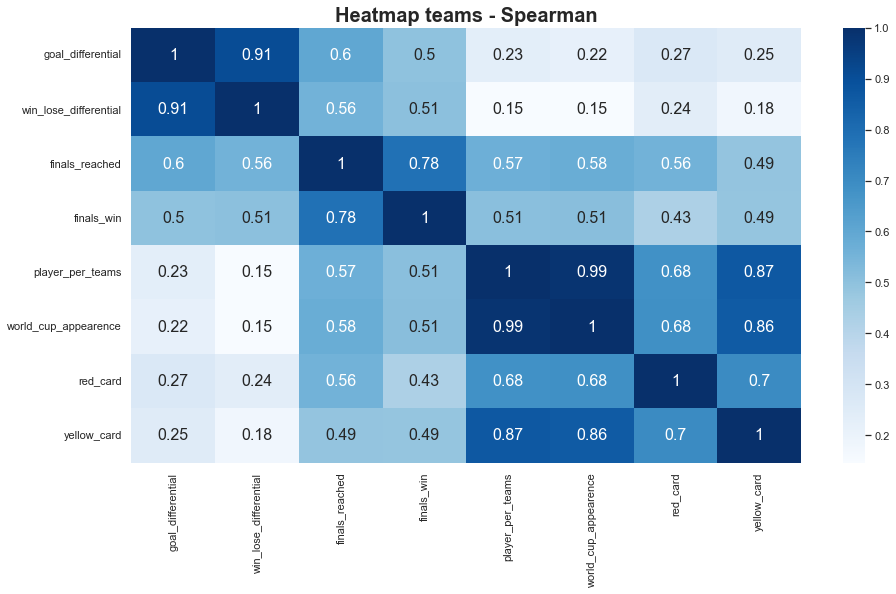

In [20]:
# HEATMAP CON CORRELAZIONE DI SPEARMAN

plt.figure(figsize=(15,8))
sns.heatmap(df_team_stats.drop(["team_id"], axis=1).corr(method = 'spearman'), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap teams - Spearman', fontweight='bold', fontsize=20)
plt.show()